# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

RuntimeError: matplotlib does not support generators as input

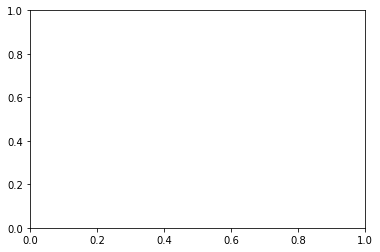

In [5]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b');

In [6]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [7]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [8]:
print(test_labels)

[-16.65927231  45.05465366 -21.47606913 -63.4056294   17.64282734
 -42.44469577   0.34799656 -40.84204295 -16.30914909  41.1068411
  25.24428409 -13.26392817  13.31981235  64.19559505 -52.37232463
 -17.27897399 -19.16792315  58.26281761  24.82763821 -22.32195021
 -37.31870104 -18.57607726 -22.64686884 -80.80239408 -16.79027112
  13.02656201 -10.29545833 -24.77820218  24.47584129  14.76930132]


In [9]:
print(predictions)

[-14.63215417  42.18837478 -17.6084252  -60.38415551  22.15899272
 -38.86546038  -1.53422425 -45.65779927 -11.69987259  36.82607175
  14.68958432 -16.13007409  14.66148247  69.94371219 -40.26964944
 -13.27000398 -10.24940524  56.92162522  30.97457582 -22.1458501
 -34.94245829 -24.59655171 -17.21384139 -77.90468508 -14.57610317
  18.81775594 -11.05304905 -26.89980964  23.08956336   8.40072658]


In [10]:
metrics.mean_absolute_error(test_labels, predictions)

4.1345943703754635

In [11]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

SyntaxError: invalid syntax (<ipython-input-11-34c7b3b37a4f>, line 3)

In [12]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [13]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [14]:
coef

array([38.07925837,  0.        ])

In [18]:
linear_regressor.coef_

array([ 38.14900714,  -0.2051579 ])

In [15]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.223273760463242

In [16]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [17]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.09*x1 + 0.60*x2 + -0.22


#### Lasso

In [18]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [19]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.1544782466663985, std: 1.0170354384993352


In [20]:
print(lasso_regressor.coef_)

[37.37221929  0.        ]


In [21]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [22]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.37*x1 + 0.00*x2
